In [1]:
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import glob
import os
from os.path import join
import pandas as pd
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
#annotation=doc['annotation_gtf']
annotation=doc['annotation']

from Homer import *

os.chdir(doc["results"])
%load_ext autoreload
%autoreload 2

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if __name__ == '__main__':


In [2]:
from tss.visualize.fig_utils import stack_bars, helper_save

params {'EMAIL': 'isshamie@ucsd.edu', 'parameters': 'parameters/params.yaml'}


In [3]:
outdir = join("csRNA_pipeline/annotated_csRNA_samples")
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [4]:
def df_stacked_bar(files, column="annotation", f_save=None):
    csRNA_peak_files = glob.glob("csRNA_pipeline/csRNA_peaks/*.tss.txt")
    anno_labels = set()
    anno_count = dict()

    for f in files:
        print(f)
        df = pd.read_csv(f,sep="\t", index_col=0)
        anno_labels = anno_labels.union(set(df[column].unique()))
        if len(df) == 0:
            print("Empty")
        else:
            anno_count[os.path.basename(f)] = df.groupby(column).count().iloc[:,0].to_dict()
    x = np.array(list(anno_labels))
    ys = []
    ys = pd.DataFrame(index=x, columns = anno_count.keys(), dtype=int)
    ys.loc[:,:] = 0
    for s in anno_count:
        for type_count in anno_count[s]: 
            ys.at[type_count,s] = anno_count[s][type_count]
    stack_bars(ys.columns.values, ys=(ys/(ys.sum(axis=0))).to_numpy(), ylabels=x)
    plt.title(column)
    
    helper_save(f_save)
    return anno_count

csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/MiscOrgans_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Liver_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Spleen_START2_STARTinput1_RNASeq1.tss.txt


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


csRNA_pipeline/csRNA_peaks/Heart_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Kidney_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Heart_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Muscle_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Pancreas_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Pancreas_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Lung_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput2_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/MiscOrgans_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Lung_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_STAR

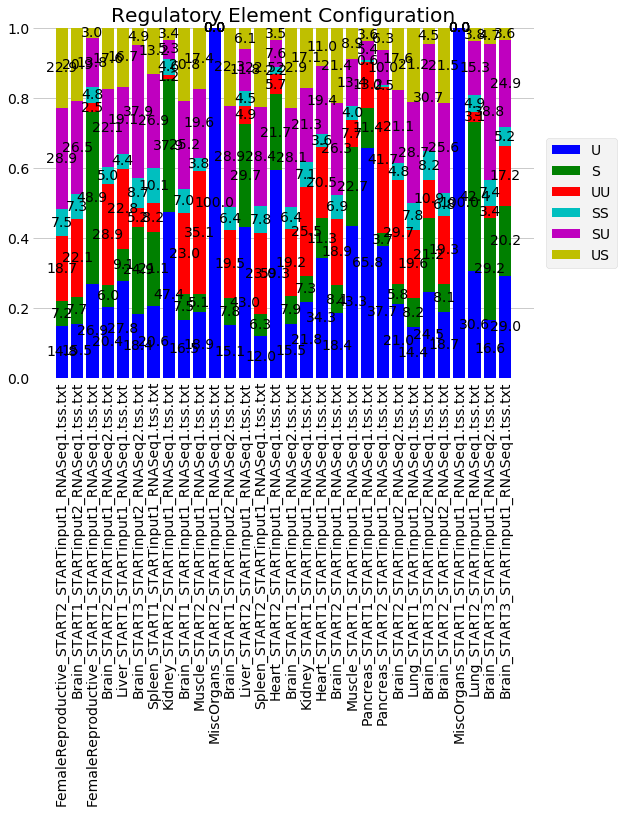

In [5]:
anno_count = df_stacked_bar(glob.glob("csRNA_pipeline/csRNA_peaks/*.tss.txt"), column="Regulatory Element Configuration",
                           f_save=join(outdir,"txn_stability"))

csRNA_pipeline/csRNA_peaks/FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START2_STARTinput1_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Liver_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START3_STARTinput2_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Spleen_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Kidney_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Muscle_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/MiscOrgans_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Brain_START1_STARTinput2_RNASeq2.tss.txt
csRNA_pipeline/csRNA_peaks/Liver_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipeline/csRNA_peaks/Spleen_START2_STARTinput1_RNASeq1.tss.txt
csRNA_pipelin

{'FemaleReproductive_START2_STARTinput1_RNASeq1.tss.txt': {'firstExon': 907,
  'other': 17735,
  'otherExon': 424,
  'otherExonBidirectional': 382,
  'singleExon': 310,
  'tss': 10843,
  'tssAntisense': 5722},
 'Brain_START1_STARTinput2_RNASeq1.tss.txt': {'firstExon': 1111,
  'other': 18872,
  'otherExon': 836,
  'otherExonBidirectional': 452,
  'singleExon': 397,
  'tss': 12511,
  'tssAntisense': 6870},
 'FemaleReproductive_START1_STARTinput1_RNASeq1.tss.txt': {'firstExon': 250,
  'other': 4003,
  'otherExon': 1091,
  'otherExonBidirectional': 29,
  'singleExon': 194,
  'tss': 2621,
  'tssAntisense': 213},
 'Brain_START2_STARTinput1_RNASeq2.tss.txt': {'firstExon': 1071,
  'other': 23004,
  'otherExon': 660,
  'otherExonBidirectional': 375,
  'singleExon': 365,
  'tss': 12475,
  'tssAntisense': 6554},
 'Liver_START1_STARTinput1_RNASeq1.tss.txt': {'firstExon': 634,
  'other': 24597,
  'otherExon': 653,
  'otherExonBidirectional': 313,
  'singleExon': 252,
  'tss': 8490,
  'tssAntisense'

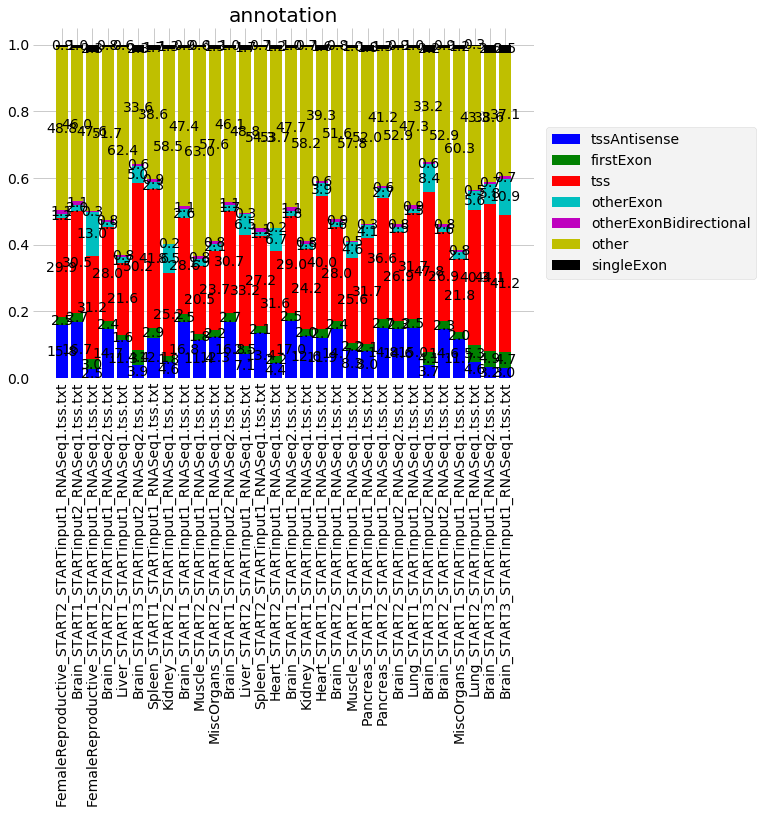

In [6]:
df_stacked_bar(glob.glob("csRNA_pipeline/csRNA_peaks/*.tss.txt"), column="annotation", 
               f_save=join(outdir,"txn_annotation"))